In [1]:
import numpy as np
import pandas as pd
%pylab inline

import os
import pathlib
PFASST_TOOLS_PATH = str(pathlib.Path(os.getcwd()).parent.parent / 'tools')
sys.path.append(PFASST_TOOLS_PATH)
import pfasst_py

base_path = pfasst_py.PFASST_RUN_DIR + "/juqueen"

Populating the interactive namespace from numpy and matplotlib


In [2]:
obj = pfasst_py.ScaleStudy(base_path + '/mpi_pfasst_scale',
                           pfasst_py.AdvecDiffDataPattern).gather().pickle('cores1-512')

gathering in base path '/home/t.klatt/projects/PFASST/run/juqueen/mpi_pfasst_scale'
  - 25630ea9d9d6e7e0005151046ac44f5a3bef9742
      np        : 1
      cpn       : 1
      duration  : 0 days 00:14:51.999490
  - c6f10c0610f7d4d4b3bbef4c9c9903c1bdff0505
      np        : 2
      cpn       : 2
      duration  : 0 days 00:06:07.000538
  - 368181a4fe82db157911844b3d21a57c26f7be95
      np        : 4
      cpn       : 4
      duration  : 0 days 00:03:57.000244
  - f7437c9406e0911e9e42d853ce337be1f017766f
      np        : 8
      cpn       : 8
      duration  : 0 days 00:09:23.999518
  - afeeea92001ab4e9cd6b2650bff38aff409665ce
      np        : 16
      cpn       : 16
      duration  : 0 days 00:13:08.999942
  - 46fff803cd56164355386c159fb82bcf7f715ba2
      np        : 128
      cpn       : 16
      duration  : 0 days 00:01:41.999143
  - 82450145aaed730a798b39420893dd0c0fc6635d
      np        : 32
      cpn       : 16
      duration  : 0 days 00:07:08.000478
  - b3d5fecb3fc7460429fc548

   cpn        duration   np
0    1 00:14:51.999490    1
1    2 00:06:07.000538    2
2    4 00:03:57.000244    4
3    8 00:09:23.999518    8
4   16 00:13:08.999942   16
6   16 00:07:08.000478   32
8   16 00:03:25.000197   64
5   16 00:01:41.999143  128
9   16 00:01:07.000021  256
7   16 00:01:05.999900  512


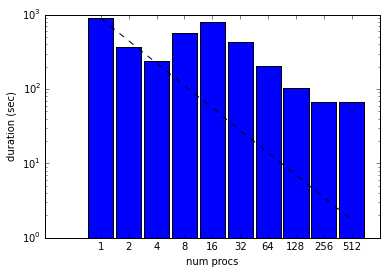

In [3]:
obj.plot_np_vs_duration()

In [4]:
obj.as_dataframe(drop=False).sort('np')

,cpn,dir,duration,np,parser_set
0,1,25630ea9d9d6e7e0005151046ac44f5a3bef9742,00:14:51.999490,1,<pfasst_py.parse_log.LogParserSet object at 0x...
1,2,c6f10c0610f7d4d4b3bbef4c9c9903c1bdff0505,00:06:07.000538,2,<pfasst_py.parse_log.LogParserSet object at 0x...
2,4,368181a4fe82db157911844b3d21a57c26f7be95,00:03:57.000244,4,<pfasst_py.parse_log.LogParserSet object at 0x...
3,8,f7437c9406e0911e9e42d853ce337be1f017766f,00:09:23.999518,8,<pfasst_py.parse_log.LogParserSet object at 0x...
4,16,afeeea92001ab4e9cd6b2650bff38aff409665ce,00:13:08.999942,16,<pfasst_py.parse_log.LogParserSet object at 0x...
6,16,82450145aaed730a798b39420893dd0c0fc6635d,00:07:08.000478,32,<pfasst_py.parse_log.LogParserSet object at 0x...
8,16,bf6e248ce766ebceab00bb260e6ffb10183a0a4d,00:03:25.000197,64,<pfasst_py.parse_log.LogParserSet object at 0x...
5,16,46fff803cd56164355386c159fb82bcf7f715ba2,00:01:41.999143,128,<pfasst_py.parse_log.LogParserSet object at 0x...
9,16,eada6df2e42604069f18fe4fe0ba3047d1392b50,00:01:07.000021,256,<pfasst_py.parse_log.LogParserSet object at 0x...
7,16,b3d5fecb3fc7460429fc548a688c2876f8ad3e95,00:01:05.999900,512,<pfasst_py.parse_log.LogParserSet object at 0x...


In [20]:
ds = obj.as_dataframe(False)
ds['max_iter'] = 0
ds['residual'] = 0

In [24]:
for i in ds.index:
    df = ds.iloc[i].parser_set.get_dataframe()
    print(df.tail(1))
    max_iter = df.tail(1).iter.values[0]
    residual = df.tail(1).residual.values[0]
    print("%d: iter=%d, residual=%f" % (i, max_iter, residual))

       error  iter  n1    n2  rank      residual  step            time
4004  1.0158     2   5  2048     0  8.558600e-11   513 00:14:51.999490
0: iter=2, residual=0.000000
       error  iter  n1    n2  rank      residual  step            time
4109  1.0159     0   3  1024     1  1.054500e-10   512 00:06:07.000538
1: iter=0, residual=0.000000
       error  iter  n1    n2  rank      residual  step            time
5361  1.0159     2   3  1024     3  8.552000e-09   512 00:03:57.000244
2: iter=2, residual=0.000000
        error  iter  n1    n2  rank      residual  step            time
12845  1.0159    10   3  1024     7  3.343300e-09   512 00:09:23.999518
3: iter=10, residual=0.000000
        error  iter  n1    n2  rank      residual  step            time
36354  1.0159    49   3  1024    15  9.986700e-10   512 00:13:08.999942
4: iter=49, residual=0.000000
        error  iter  n1    n2  rank      residual  step            time
74111  1.0159    49   3  1024   127  2.634100e-08   512 00:01:41.99

In [25]:
ds.sort('np')

,cpn,dir,duration,np,parser_set,max_iter,residual
0,1,25630ea9d9d6e7e0005151046ac44f5a3bef9742,00:14:51.999490,1,<pfasst_py.parse_log.LogParserSet object at 0x...,2,0
1,2,c6f10c0610f7d4d4b3bbef4c9c9903c1bdff0505,00:06:07.000538,2,<pfasst_py.parse_log.LogParserSet object at 0x...,0,0
2,4,368181a4fe82db157911844b3d21a57c26f7be95,00:03:57.000244,4,<pfasst_py.parse_log.LogParserSet object at 0x...,2,0
3,8,f7437c9406e0911e9e42d853ce337be1f017766f,00:09:23.999518,8,<pfasst_py.parse_log.LogParserSet object at 0x...,10,0
4,16,afeeea92001ab4e9cd6b2650bff38aff409665ce,00:13:08.999942,16,<pfasst_py.parse_log.LogParserSet object at 0x...,49,0
6,16,82450145aaed730a798b39420893dd0c0fc6635d,00:07:08.000478,32,<pfasst_py.parse_log.LogParserSet object at 0x...,49,0
8,16,bf6e248ce766ebceab00bb260e6ffb10183a0a4d,00:03:25.000197,64,<pfasst_py.parse_log.LogParserSet object at 0x...,49,0
5,16,46fff803cd56164355386c159fb82bcf7f715ba2,00:01:41.999143,128,<pfasst_py.parse_log.LogParserSet object at 0x...,49,0
9,16,eada6df2e42604069f18fe4fe0ba3047d1392b50,00:01:07.000021,256,<pfasst_py.parse_log.LogParserSet object at 0x...,5,0
7,16,b3d5fecb3fc7460429fc548a688c2876f8ad3e95,00:01:05.999900,512,<pfasst_py.parse_log.LogParserSet object at 0x...,14,0
